In [42]:
import pandas as pd
import numpy as np
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
!git clone https://github.com/mk-Bar/20projektKoncowy.git


Cloning into '20projektKoncowy'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 1.37 MiB | 17.93 MiB/s, done.


In [44]:
%cd 20projektKoncowy
!ls -R .


/content/20projektKoncowy/20projektKoncowy/20projektKoncowy/20projektKoncowy/20projektKoncowy
.:
default_of_credit_card_clients.xls


# Zadanie: projekt końcowy
Wiesz już, jak powinien wyglądać projekt końcowy. Wykonaj go samodzielnie dla problemu klasyfikacji i wykorzystaj do tego zbiór danych default_of_credit_card_clients.xls. Pobierz go teraz. Twoim problemem do rozwiązania jest klasyfikacja, czy przyznać kartę kredytową.

Poniżej opis zmiennych:




Miej na uwadze, że w danych mogą pojawić się błędy. Projekt wykonany umieść na platformie GitHub i prześlij go Mentorowi. Wykorzystać możesz całą wiedzę zdobytą do tej pory.

In [45]:
# This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
# X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
# X2: Gender (1 = male; 2 = female).
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
# X4: Marital status (1 = married; 2 = single; 3 = others).
# X5: Age (year).
# X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005;
# X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .;
# X8 = payment delay for eight months;
# X9 = payment delay for nine months and above.
# X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .;
# X17 = amount of bill statement in April, 2005.
# X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;
# X23 = amount paid in April, 2005.

In [46]:
dataframe = pd.read_excel('default_of_credit_card_clients.xls',header=1)

dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [47]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [48]:
# Czy są wartości brakujące?
print("Missing values: ")
print(f"{dataframe.isnull().mean()*100}")
if dataframe.isnull().mean().sum() == 0:
  print("Brak wartości brakujących")

Missing values: 
ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default payment next month    0.0
dtype: float64
Brak wartości brakujących


In [49]:
#  rozdzaiał klas
dataClasDistribution= {"class_distribution": dataframe["default payment next month"].value_counts(normalize=True) * 100}
clssDistribution = pd.DataFrame(dataClasDistribution)
clssDistribution

,class_distribution
default payment next month,
0,77.88
1,22.12


In [50]:
# Unikalne wartości zmiennych kategorycznych
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE']
unique_values = {col: dataframe[col].unique() for col in categorical_columns}

unique_values

{'SEX': array([2, 1]),
 'EDUCATION': array([2, 1, 3, 5, 4, 6, 0]),
 'MARRIAGE': array([1, 2, 3, 0])}

In [51]:
# EDUCATION – zamieniamy 0, 5, 6 na 4 (inne)
dataframe['EDUCATION'] = dataframe['EDUCATION'].replace({0: 4, 5: 4, 6: 4})

# MARRIAGE – zamieniamy 0 na 3 (inne)
dataframe['MARRIAGE'] = dataframe['MARRIAGE'].replace({0: 3})

# Sprawdzenie ponowne unikalnych wartości po czyszczeniu
cleaned_unique_values = {col: dataframe[col].unique() for col in ['EDUCATION', 'MARRIAGE']}
cleaned_unique_values

{'EDUCATION': array([2, 1, 3, 4]), 'MARRIAGE': array([1, 2, 3])}

In [52]:
dataframe.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


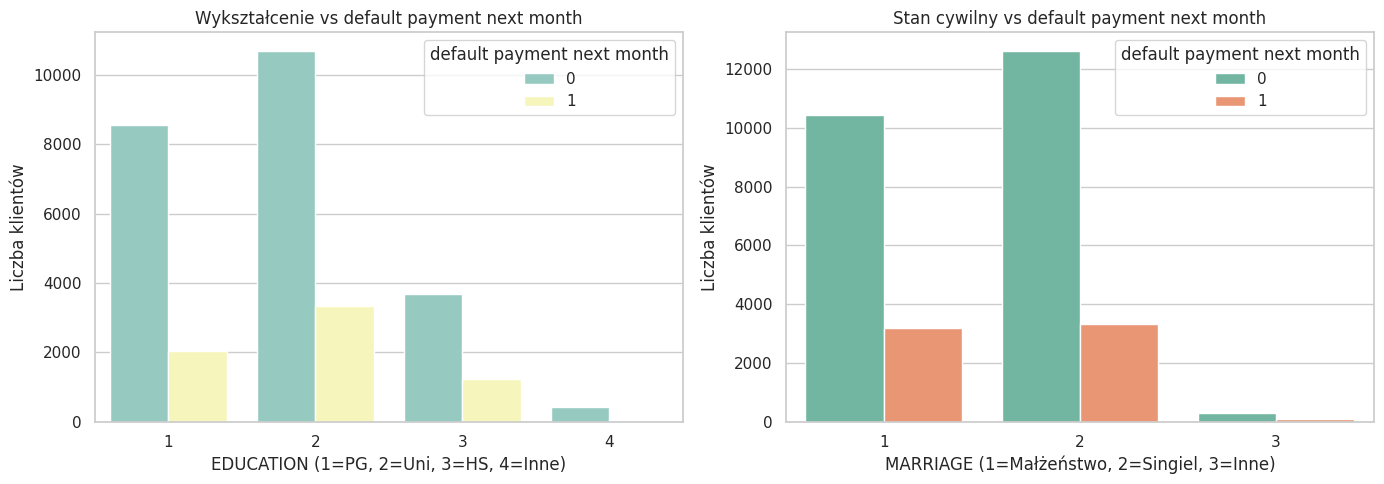

In [53]:
# Ustawienia ogólne
sns.set(style="whitegrid")
plt.figure(figsize=(14, 5))

# Wykres: EDUCATION vs default
plt.subplot(1, 2, 1)
sns.countplot(x="EDUCATION", hue="default payment next month", data=dataframe, palette="Set3")
plt.title("Wykształcenie vs default payment next month")
plt.xlabel("EDUCATION (1=PG, 2=Uni, 3=HS, 4=Inne)")
plt.ylabel("Liczba klientów")
plt.legend(title="default payment next month")

# Wykres: MARRIAGE vs default
plt.subplot(1, 2, 2)
sns.countplot(x="MARRIAGE", hue="default payment next month", data=dataframe, palette="Set2")
plt.title("Stan cywilny vs default payment next month")
plt.xlabel("MARRIAGE (1=Małżeństwo, 2=Singiel, 3=Inne)")
plt.ylabel("Liczba klientów")
plt.legend(title="default payment next month")

plt.tight_layout()
plt.show()

<ipython-input-66-2075272211a2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="default payment next month", y="AGE", data=dataframe, palette="Set2")
<ipython-input-66-2075272211a2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="default payment next month", y="LIMIT_BAL", data=dataframe, palette="Set3")


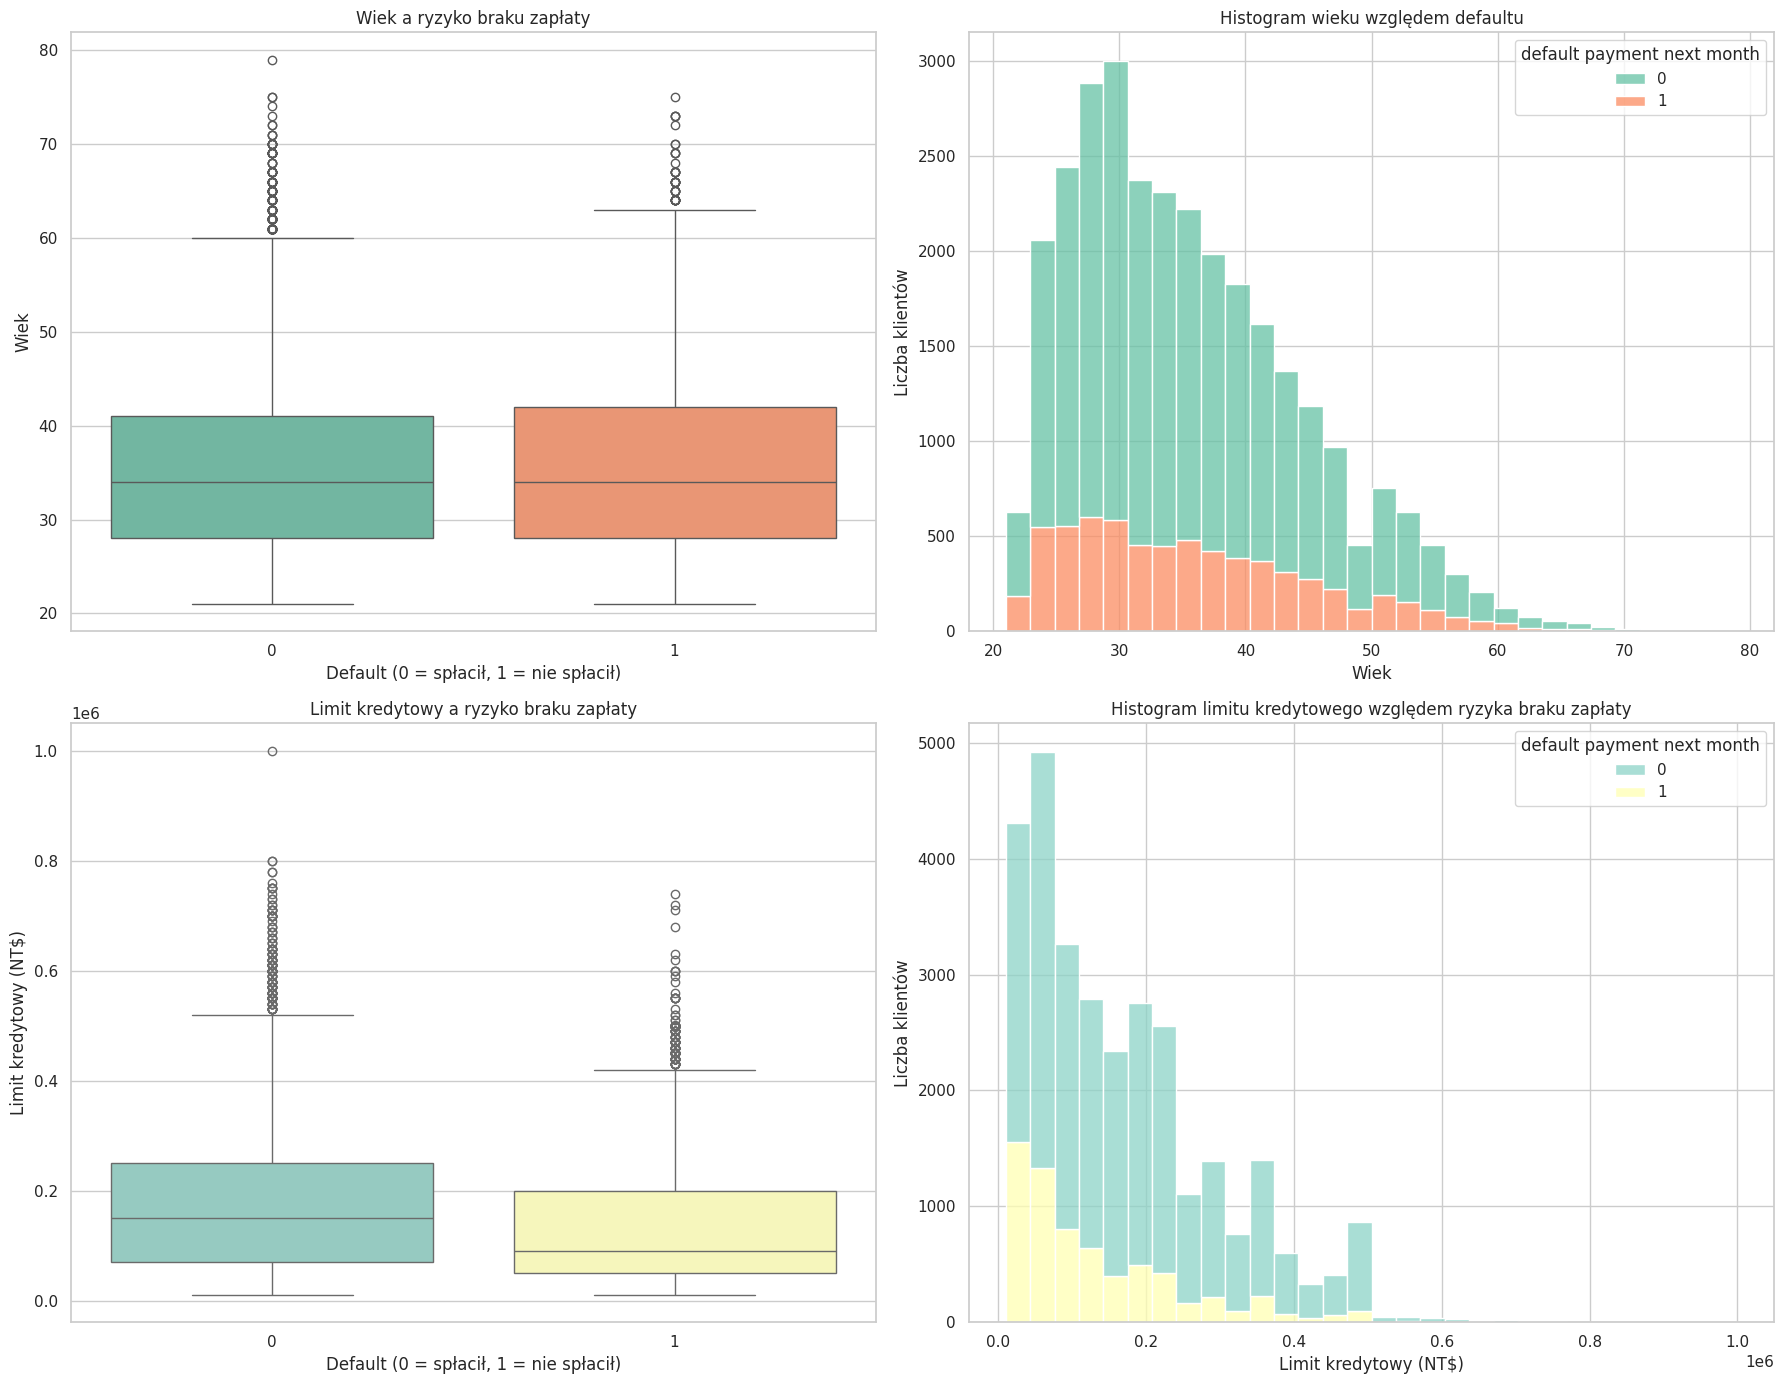

In [66]:

plt.figure(figsize=(18, 14))
# Boxplot: Wiek vs Default
plt.subplot(2, 2, 1)
sns.boxplot(x="default payment next month", y="AGE", data=dataframe, palette="Set2")
plt.title("Wiek a ryzyko braku zapłaty")
plt.xlabel("Default (0 = spłacił, 1 = nie spłacił)")
plt.ylabel("Wiek")

# Histogram: Wiek
plt.subplot(2, 2, 2)
sns.histplot(data=dataframe, x="AGE", hue="default payment next month", multiple="stack", palette="Set2", bins=30)
plt.title("Histogram wieku względem defaultu")
plt.xlabel("Wiek")
plt.ylabel("Liczba klientów")

# Boxplot: LIMIT_BAL vs Default
plt.subplot(2, 2, 3)
sns.boxplot(x="default payment next month", y="LIMIT_BAL", data=dataframe, palette="Set3")
plt.title("Limit kredytowy a ryzyko braku zapłaty")
plt.xlabel("Default (0 = spłacił, 1 = nie spłacił)")
plt.ylabel("Limit kredytowy (NT$)")

# Histogram: LIMIT_BAL
plt.subplot(2, 2, 4)
sns.histplot(data=dataframe, x="LIMIT_BAL", hue="default payment next month", multiple="stack", palette="Set3", bins=30)
plt.title("Histogram limitu kredytowego względem ryzyka braku zapłaty")
plt.xlabel("Limit kredytowy (NT$)")
plt.ylabel("Liczba klientów")

plt.tight_layout()
plt.show()

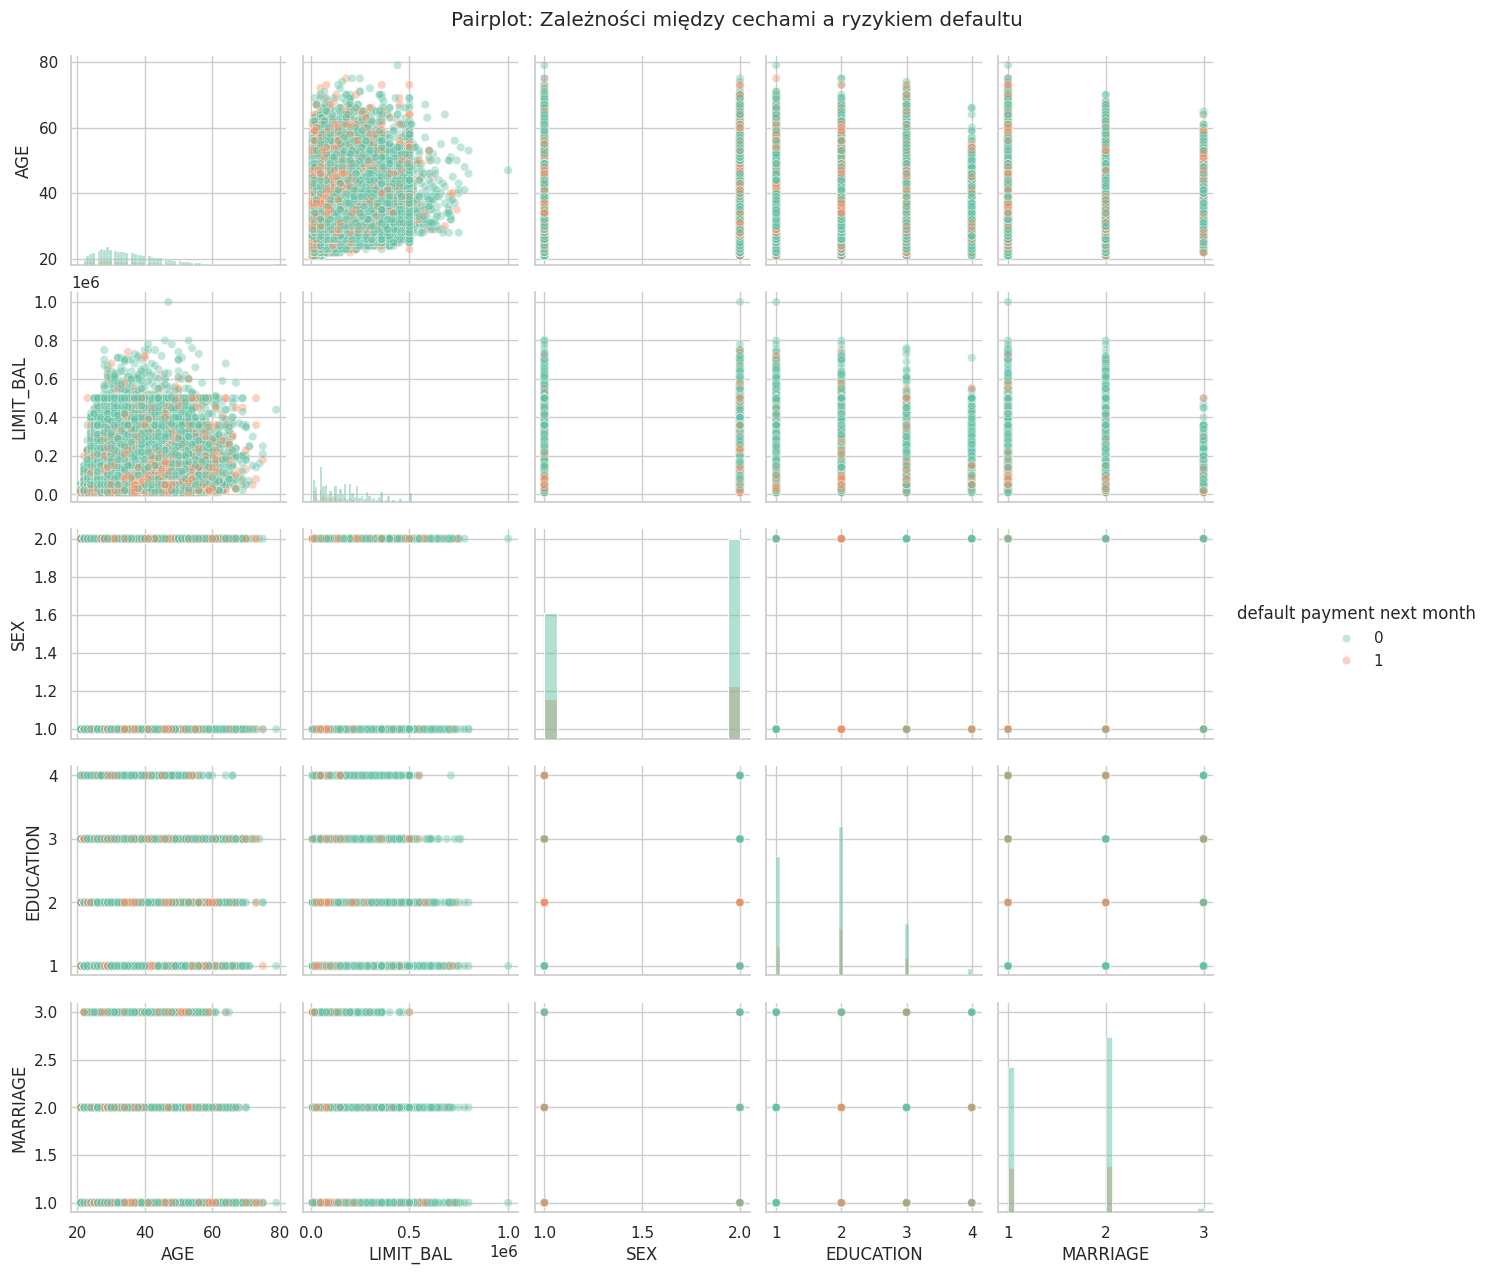

In [55]:
# Wybór kilku istotnych zmiennych do pairplotu
selected_columns = ['AGE', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month']

# Tworzymy nową ramkę danych tylko z wybranymi kolumnami
df_pairplot = dataframe[selected_columns]

# Wizualizacja pairplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_pairplot, hue='default payment next month', palette='Set2', diag_kind='hist', plot_kws={'alpha': 0.4})
plt.suptitle("Pairplot: Zależności między cechami a ryzykiem defaultu", y=1.02)
plt.show()

Podział na zbiory treningowy i testowy


In [56]:
# Separacja X i y
X = dataframe.drop(columns=["default payment next month", "ID"])
y = dataframe["default payment next month"]

# Skalowanie cech numerycznych (wszystkie są numeryczne)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Podział na zbiór treningowy i testowy (z zachowaniem proporcji klas)
X_train, X_test, y_train, y_test = train_test_split(    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Selekcja cech:

In [57]:
# Trening modelu na pełnych danych
model = RandomForestClassifier(n_estimators=1000, max_depth=20, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# Obliczenie ważności cech
importances = model.feature_importances_
features_df = pd.DataFrame({
    'feat': dataframe.drop(columns=["default payment next month", "ID"]).columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)



In [58]:
features_df

,feat,importance
5,PAY_0,0.118762
11,BILL_AMT1,0.057470
4,AGE,0.053885
6,PAY_2,0.053230
12,BILL_AMT2,0.053105
0,LIMIT_BAL,0.050815
17,PAY_AMT1,0.050043
13,BILL_AMT3,0.049803
16,BILL_AMT6,0.049176
15,BILL_AMT5,0.048978


Filtrowanie cech o znaczeniu powyżej progu

In [59]:
features_selected = features_df[features_df['importance'] > 0.0075]

In [74]:
# Tworzymy nowe zbiory X_train i X_test tylko z tych cech
import numpy as np

feature_names = dataframe.drop(columns=["default payment next month", "ID"]).columns

X_train_sel = pd.DataFrame(X_train, columns=feature_names)[features_selected].values
X_test_sel = pd.DataFrame(X_test, columns=feature_names)[features_selected].values

# Trenujemy nowy model Random Forest na ograniczonym zbiorze cech
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_sel, y_train)



RandomForestClassifier(random_state=42)

In [75]:
# Predykcja na zbiorze testowym
y_pred = rf_model.predict(X_test_sel)

# Ewaluacja modelu
from sklearn.metrics import classification_report, confusion_matrix


def classification_evaluation(yhat, ytest):
    # Macierz pomyłek
    cm = confusion_matrix(ytest, yhat)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Spłacił (0)", "Default (1)"])

    # Raport klasyfikacji
    report = classification_report(ytest, yhat, target_names=["Spłacił (0)", "Default (1)"])

    # Wizualizacja
    plt.figure(figsize=(6, 5))
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Macierz pomyłek")
    plt.show()

    print("Raport klasyfikacji:")
    print(report)



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 600x500 with 0 Axes>

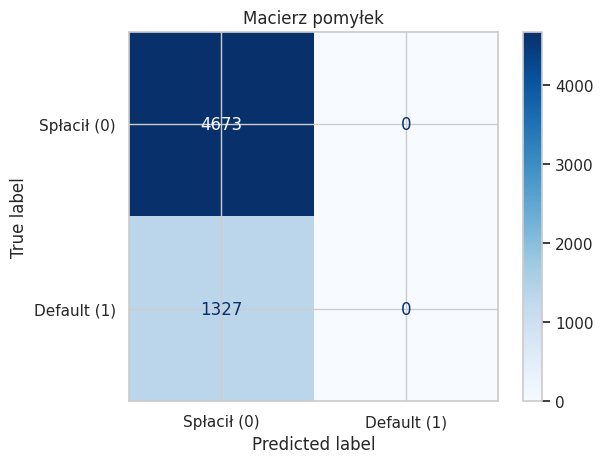

Raport klasyfikacji:
              precision    recall  f1-score   support

 Spłacił (0)       0.78      1.00      0.88      4673
 Default (1)       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



In [76]:
y_pred = model.predict(X_test_sel)
classification_evaluation(y_pred, y_test)

Wniosek : Model nauczył się, że lepiej "zgadywać zawsze 0", bo daje mu to najwyższą dokładność — ale to nieprzydatne biznesowo, bo ignoruje tych, którzy nie spłacą.

In [77]:
# Trenowanie XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predykcja i ocena
y_pred_xgb = xgb_model.predict(X_test)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
report_xgb_df = pd.DataFrame(report_xgb).transpose()

print(report_xgb_df)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:34:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score      support
0              0.836218  0.940723  0.885398  4673.000000
1              0.627187  0.351168  0.450242  1327.000000
accuracy       0.810333  0.810333  0.810333     0.810333
macro avg      0.731703  0.645946  0.667820  6000.000000
weighted avg   0.789988  0.810333  0.789156  6000.000000


In [78]:
# Lekka konfiguracja XGBoost
xgb_model_fast = XGBClassifier(
    n_estimators=50,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Trenowanie modelu
xgb_model_fast.fit(X_train, y_train)

# Predykcja i raport
y_pred_xgb_fast = xgb_model_fast.predict(X_test)

from sklearn.metrics import classification_report
report_xgb_fast = classification_report(y_test, y_pred_xgb_fast, output_dict=True)
report_xgb_fast_df = pd.DataFrame(report_xgb_fast).transpose()

print(report_xgb_fast_df)
display(report_xgb_fast_df)

              precision    recall  f1-score      support
0              0.837670  0.950781  0.890648  4673.000000
1              0.669540  0.351168  0.460702  1327.000000
accuracy       0.818167  0.818167  0.818167     0.818167
macro avg      0.753605  0.650975  0.675675  6000.000000
weighted avg   0.800485  0.818167  0.795559  6000.000000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:35:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,precision,recall,f1-score,support
0,0.837670,0.950781,0.890648,4673.000000
1,0.669540,0.351168,0.460702,1327.000000
accuracy,0.818167,0.818167,0.818167,0.818167
macro avg,0.753605,0.650975,0.675675,6000.000000
weighted avg,0.800485,0.818167,0.795559,6000.000000


Siec neuronowa w Keras

In [79]:


# Budowa modelu Sequential
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # sigmoid dla klasyfikacji binarnej
])

# Kompilacja modelu
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Wczesne zatrzymanie
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Trenowanie modelu
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=64, callbacks=[early_stop], verbose=1)

# Ewaluacja
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

# Predykcje i klasyfikacja
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

from sklearn.metrics import classification_report
report_keras = classification_report(y_test, y_pred_classes, output_dict=True)
report_keras_df = pd.DataFrame(report_keras).transpose()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7704 - loss: 0.5354 - val_accuracy: 0.8055 - val_loss: 0.4641
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8117 - loss: 0.4633 - val_accuracy: 0.8127 - val_loss: 0.4510
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8146 - loss: 0.4522 - val_accuracy: 0.8167 - val_loss: 0.4445
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8157 - loss: 0.4492 - val_accuracy: 0.8152 - val_loss: 0.4421
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8202 - loss: 0.4379 - val_accuracy: 0.8175 - val_loss: 0.4404
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8146 - loss: 0.4440 - val_accuracy: 0.8172 - val_loss: 0.4398
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8118 - loss: 0.4503 - val_accuracy: 0.8162 - val_loss: 0.4384
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8174 - loss: 0.4382 - val_accuracy: 0.8190 - val_

In [80]:
report_keras_df

,precision,recall,f1-score,support
0,0.836019,0.954633,0.891398,4673.000000
1,0.680723,0.340618,0.454043,1327.000000
accuracy,0.818833,0.818833,0.818833,0.818833
macro avg,0.758371,0.647625,0.672720,6000.000000
weighted avg,0.801673,0.818833,0.794669,6000.000000


<Figure size 600x500 with 0 Axes>

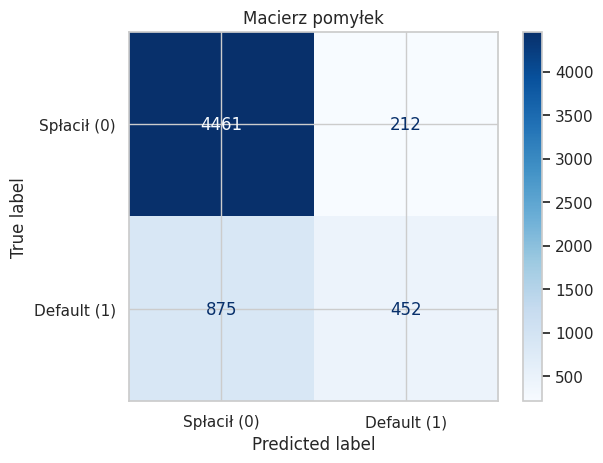

Raport klasyfikacji:
              precision    recall  f1-score   support

 Spłacił (0)       0.84      0.95      0.89      4673
 Default (1)       0.68      0.34      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [81]:
classification_evaluation(y_pred_classes, y_test)

 RandomForestClassifier + Zastosowanie SMOTE do zrównoważenia danych treningowych



<Figure size 600x500 with 0 Axes>

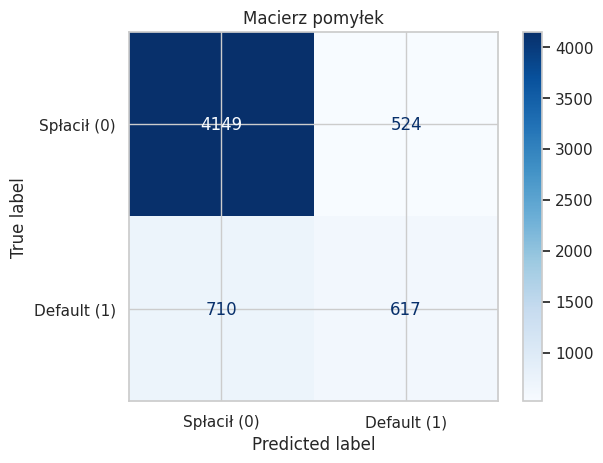

Raport klasyfikacji:
              precision    recall  f1-score   support

 Spłacił (0)       0.85      0.89      0.87      4673
 Default (1)       0.54      0.46      0.50      1327

    accuracy                           0.79      6000
   macro avg       0.70      0.68      0.69      6000
weighted avg       0.78      0.79      0.79      6000



In [82]:
# SMOTE - oversampling klasy 1
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Trenowanie modelu na danych po SMOTE
rf_smote_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_smote_model.fit(X_train_resampled, y_train_resampled)

# Predykcja
y_pred_smote = rf_smote_model.predict(X_test)

classification_evaluation(y_pred_smote, y_test)

GridSearch

Fitting 3 folds for each of 16 candidates, totalling 48 fits


<Figure size 600x500 with 0 Axes>

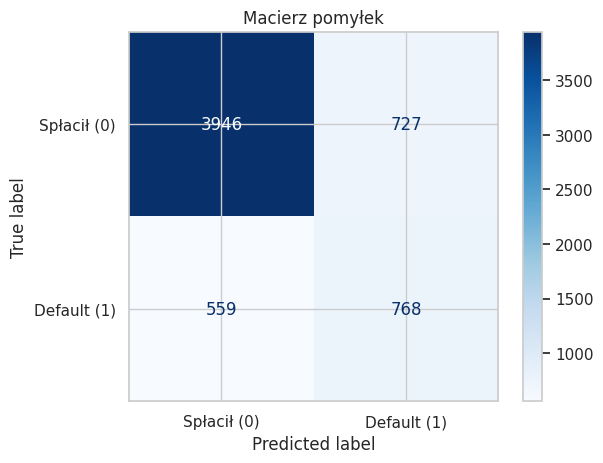

Raport klasyfikacji:
              precision    recall  f1-score   support

 Spłacił (0)       0.88      0.84      0.86      4673
 Default (1)       0.51      0.58      0.54      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.80      0.79      0.79      6000



In [84]:

from sklearn.model_selection import GridSearchCV
# Definicja parametrow do przeszukania
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'class_weight': ['balanced']
}

# GridSearch z 3-krotną walidacją krzyżową
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Trenowanie
grid_search.fit(X_train, y_train)

# Najlepszy model
best_rf = grid_search.best_estimator_

# Predykcja
y_pred_best_rf = best_rf.predict(X_test)

classification_evaluation(y_pred_best_rf, y_test)


parametryzacja sieci neuronowej

In [96]:
def build_model(hidden_layers=[128, 64, 32, 16],
                dropout_rates=[0.4, 0.3, 0.2,0.1],
                learning_rate=0.0005,
                input_dim=None):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation='relu', input_shape=(input_dim,)))
    model.add(Dropout(dropout_rates[0]))
    for units, dropout in zip(hidden_layers[1:], dropout_rates[1:]):
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Przygotowanie i trening
model = build_model(input_dim=X_train.shape[1])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, callbacks=[early_stop], verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6891 - loss: 0.5949 - val_accuracy: 0.8075 - val_loss: 0.4668
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8055 - loss: 0.4806 - val_accuracy: 0.8105 - val_loss: 0.4538
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8066 - loss: 0.4700 - val_accuracy: 0.8125 - val_loss: 0.4467
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8164 - loss: 0.4523 - val_accuracy: 0.8122 - val_loss: 0.4451
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8146 - loss: 0.4505 - val_accuracy: 0.8143 - val_loss: 0.4433
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8126 - loss: 0.4517 - val_accuracy: 0.8162 - val_loss: 0.4427
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8144 - loss: 0.4434 - val_accuracy: 0.8160 - val_loss: 0.4417
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8147 - loss: 0.4485 - val_accuracy: 0.8182 - val_

In [97]:
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.2).astype(int) # celowo obnizony prog w celu klasyfikacji wiekszej ilosci y jako 1

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Figure size 600x500 with 0 Axes>

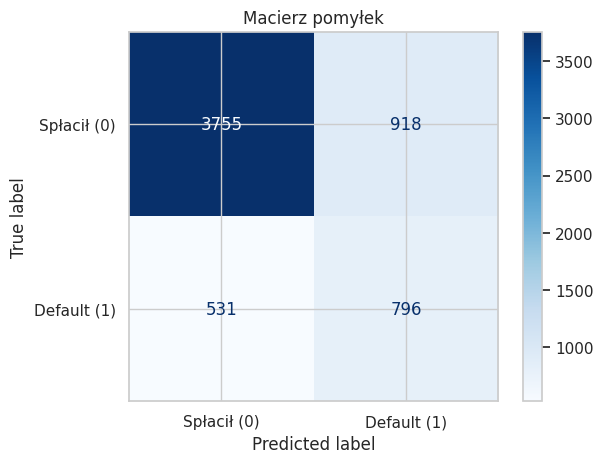

Raport klasyfikacji:
              precision    recall  f1-score   support

 Spłacił (0)       0.88      0.80      0.84      4673
 Default (1)       0.46      0.60      0.52      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.79      0.76      0.77      6000



In [98]:
classification_evaluation(y_pred_classes, y_test)

In [99]:
confusion_matrix(y_test, y_pred_classes)

array([[3755,  918],
       [ 531,  796]])

GridSearchCV dla Random Forest wiecej parametrów

In [100]:
from sklearn.metrics import  roc_auc_score, make_scorer, recall_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Rozszerzona siatka parametrów
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Model i walidacja krzyżowa
rf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Własna metryka - recall dla klasy 1
scorer = make_scorer(recall_score, pos_label=1)

# GridSearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Dopasowanie modelu
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Predykcja i ocena
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 81 candidates, totalling 405 fits


<Figure size 600x500 with 0 Axes>

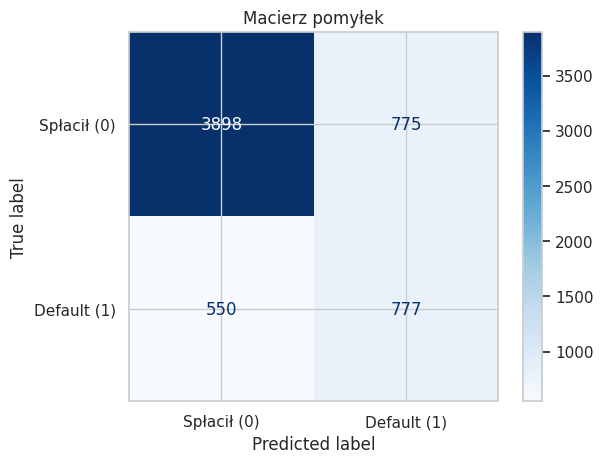

Raport klasyfikacji:
              precision    recall  f1-score   support

 Spłacił (0)       0.88      0.83      0.85      4673
 Default (1)       0.50      0.59      0.54      1327

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.79      6000



In [101]:
classification_evaluation(y_pred, y_test)

Wnioski:
Wszystkie modele trenowane były na ograniczonym zbiorze cech, features_df['importance'] > 0.0075]
Najgorzej wypadł bazowy model RandomForestClassifier. Za każdym razem przewidywał  spłatę.
Zdecydowanie lepsze rezultaty dały modele RandomForestClassifier  z GridSearch, z 3-krotną walidacją krzyżową i zmodyfikowany, sparametryzowany GridSearch. Ten ostatni wymagał jednak sporo czasu na uzyskanie wyniku.
Sprawdzone zostały również modele sieci neuronowej mające na celu klasyfikacje binarną. Przy pierwszej próbie (doborze parametrów) i z zastosowaniem progu 0,5 wyniki dla y=1 (brak spłaty) były poniżej 0,5 co wskazuje, że modele nie nadaje się do zastosowania biznesowego (lepszy jest rzut monetą).
Po zmianie parametrów modelu i zastosowaniu progu 0,2 uzyskano lepsze przewidywanie y=1 jednak kosztem zwiększonego ryzyka niedawidowej oceny braku zapłaty (yTest=zapłacił).
Z pośród wykonanych modeli najbardziej optymalnym wydaje się RandomForestClassifier  z GridSearch, z rozszerzonymi parametrami. Do użytku biznesowego model wymaga dalszego udoskonalania lub zmiany na inną technologię przewidywania w celu lepszego przewidywania braku zapały.

